# This notebook will show the implementation of NLP upon text reviews in our database of Amazon reviews. 

## We will explain each step and their results.

We import all the libraries we will work with:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Now, we can upload/import the database and observe it:

In [2]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
amazon_reviews

/tmp/ipykernel_1655609/303157925.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

To better understand what we are working with 

In [3]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
amazon_reviews.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Observe that we have null or empty entries, let us drop them:

In [5]:
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])
amazon_reviews.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [6]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

### We observe that the data is unevenly distributed. Thus, we need to edit the database in order to even it out:

In [7]:
def random_select(df, n, rating, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column] == rating]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff

df4 = random_select(amazon_reviews, 800, 4, 'reviews.rating')
df5 = random_select(amazon_reviews, 1000, 5, 'reviews.rating')

In [8]:
df4

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
15924,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2016-10-15T00:00:00.000Z,2017-04-03T18:31:59Z,"2017-03-31T09:11:57.860Z,2017-06-04T02:17:24.9...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5026300/review...,"My children loved it, and it is great learning...",Great device for child entertainment,NaN,NaN,LJSmith
14496,AVphgVaX1cnluZ0-DR74,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-05-18T00:00:00.000Z,2017-07-02T14:34:29Z,2017-06-07T08:14:00.000Z,...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,we bought this amazon tablet because my 3 year...,Great tablet for toddlers,NaN,NaN,Momof4
6104,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-05-23T00:00:00.000Z,2017-05-21T01:17:07Z,"2017-04-30T00:07:00.000Z,2017-06-07T08:18:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,Awesome product. Got two of these for two kids...,great tablet!!!,NaN,NaN,christine
1602,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-12-23T00:00:00.000Z,2017-05-21T06:00:24Z,"2017-04-30T00:44:00.000Z,2017-06-07T09:04:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,This is a nice and cheap android device. HD di...,Nice and Cheap,NaN,NaN,Naveen
2649,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-05-19T00:00:00.000Z,2017-07-03T23:08:09Z,2017-06-07T09:02:00.000Z,...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Good features, good cost. Recommend to anyone ...",Satisfied,NaN,NaN,JoAnn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-01-23T00:00:00.000Z,2017-07-02T14:26:33Z,"2017-06-07T08:14:00.000Z,2017-04-30T00:25:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,"This is my second tablet, but first based on a...",Great Tablet for the Money,NaN,NaN,jyarb
28831,AVpidLjVilAPnD_xEVpI,NaN,B0189XYY0Q,Amazon Fire,"Electronics,Tablets & E-Readers,Tablets,Back T...","841667101743,amazonfire/51441641,amazonfirehd1...",Amazon,2017-05-15T00:00:00.000Z,NaN,"2017-09-03T08:45:18.695Z,2017-08-27T11:00:58.2...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5386601/review...,Very easy to use and does everything I need it...,Excellent tablet for the price.,NaN,NaN,Steve
17388,AVqVGWLKnnc1JgDc3jF1,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-01-23T00:00:00.000Z,2017-06-21T07:38:52Z,"2017-06-04T02:18:17.225Z,2017-06-03T18:42:28.730Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5026300/review...,This was a great purchase and would definitely...,Bought for grandsons,NaN,NaN,Fastalker
3359,AVsRjfwAU2_QcyX9PHqe,"All-New Kindle E-re

In [9]:
df5

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
25216,AVpfl8cLLJeJML43AE3S,Amazon - Amazon Tap Portable Bluetooth and Wi-...,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-09-01T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Access to millions of songs with a prime membe...,Great devise with new features added all the time,NaN,NaN,Nappy
29087,AVpfpK8KLJeJML43BCuD,NaN,B01BH83OOM,Amazon Echo,"Featured Brands,Electronics,Amazon Devices,Hom...","amazonecho/b01bh83oom,amazon/b01bh83oom,amazon...",Amazon,2017-02-03T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5097300/review...,Gift for my wife to listen to her music when s...,My wife loves it!,NaN,NaN,Alan
29642,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-05-13T00:00:00.000Z,2017-09-20T05:35:59Z,"2017-08-25T22:41:06.405Z,2017-08-19T09:25:48.2...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,"We have two firesticks but, now they will be r...",Processor is twice as good as the firestick.,NaN,NaN,BASSING
19655,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2017-07-02T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:05.816Z,2017-08-02T19:54:07.4...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/9439005/review...,The perfect reader you need if you choose to r...,A great eBook reader,NaN,NaN,fjm1
13354,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-01-27T00:00:00.000Z,2017-05-21T03:46:55Z,"2017-04-30T00:24:00.000Z,2017-06-07T08:14:00.000Z",...,True,NaN,1.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I purchased this for my cousin as a Christmas ...,Great buy,NaN,NaN,drrugby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10720,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-01-05T00:00:00.000Z,2017-05-21T02:03:37Z,"2017-04-30T00:15:00.000Z,2017-06-07T08:19:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,My daughter absolutely loves this tablet! It h...,Tablet for the whole family,NaN,NaN,TrendyMOM42058
18573,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2016-05-07T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:40.544Z,2017-08-02T19:52:13.1...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/9439005/review...,It is so easy to read on the Kindle. It works ...,Excellent reader!!,NaN,NaN,GMOM
4055,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-01-24T00:00:00.000Z,2017-07-02T14:22:20Z,"2017-06-07T08:14:00.000Z,2017-04-30T00:25:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,This is a great tablet to purchase for kids wh...,Great Tablet for Beginners,NaN,NaN,Torri
842

In [10]:
df = amazon_reviews #for easier code writing

In [11]:
df123 = df[df['reviews.rating'].isin([1, 2, 3])]

In [12]:
df123

/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
117,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-08T00:00:00.000Z,2017-05-21T06:03:20Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:03:00.000Z",...,True,NaN,0.0,2.0,http://reviews.bestbuy.com/3545/5620406/review...,Didn't have some of the features I was looking...,Wasn't for me,NaN,NaN,Mark
126,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-10T00:00:00.000Z,2017-05-21T06:03:08Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:03:00.000Z",...,False,NaN,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,NaN,NaN,Brandon
169,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-11-25T00:00:00.000Z,2017-05-21T06:01:20Z,"2017-04-30T00:44:00.000Z,2017-06-07T09:00:00.000Z",...,False,NaN,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this tablet for my 4 year old daughte...,Ended up returning,NaN,NaN,Mijenx
222,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-12-30T00:00:00.000Z,2017-05-21T05:59:48Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",...,False,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5620406/review...,I was hoping to use Google launcher with this ...,A cheap tablet,NaN,NaN,blargh22
226,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-03T00:00:00.000Z,2017-05-21T05:59:34Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",...,False,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5620406/review...,The tablet works fine. It is responsive with g...,Works well but too tied to Amazon.,NaN,NaN,AZ23b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger..

Now, we observe that the columns we will work with are id (or name, they are correlated) and reviews.text. We will create a new database with these two and add a column based on the reviews.rating :

- 5 : good (2)
- 3, 4 : neutral (1)
- 1, 2 : bad

In [13]:
amazon = pd.concat([df123, df4, df5], ignore_index=True)
amazon

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-08T00:00:00.000Z,2017-05-21T06:03:20Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:03:00.000Z",...,True,NaN,0.0,2.0,http://reviews.bestbuy.com/3545/5620406/review...,Didn't have some of the features I was looking...,Wasn't for me,NaN,NaN,Mark
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-10T00:00:00.000Z,2017-05-21T06:03:08Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:03:00.000Z",...,False,NaN,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,NaN,NaN,Brandon
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-11-25T00:00:00.000Z,2017-05-21T06:01:20Z,"2017-04-30T00:44:00.000Z,2017-06-07T09:00:00.000Z",...,False,NaN,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this tablet for my 4 year old daughte...,Ended up returning,NaN,NaN,Mijenx
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2016-12-30T00:00:00.000Z,2017-05-21T05:59:48Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",...,False,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5620406/review...,I was hoping to use Google launcher with this ...,A cheap tablet,NaN,NaN,blargh22
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-03T00:00:00.000Z,2017-05-21T05:59:34Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",...,False,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5620406/review...,The tablet works fine. It is responsive with g...,Works well but too tied to Amazon.,NaN,NaN,AZ23b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-01-05T00:00:00.000Z,2017-05-21T02:03:37Z,"2017-04-30T00:15:00.000Z,2017-06-07T08:19:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,My daughter absolutely loves this tablet! It h...,Tablet for the whole family,NaN,NaN,TrendyMOM42058
4107,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2016-05-07T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:40.544Z,2017-08-02T19:52:13.1...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/9439005/review...,It is so easy to read on the Kindle. It works ...,Excellent reader!!,NaN,NaN,GMOM
4108,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2017-01-24T00:00:00.000Z,2017-07-02T14:22:20Z,"2017-06-07T08:14:00.000Z,2017-04-30T00:25:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,This is a great tablet to purchase for kids 

In [14]:
def label(r):
    if r == 5:
        return 2
    elif r == 3 or r == 4:
        return 1
    return 0

amazon["rating"] = amazon_reviews["reviews.rating"].apply(label)

Now we have the final database we will work for this Sentiment Analysis implementation.

In [15]:
amazon = amazon[['id', 'reviews.text', 'rating']]
amazon = amazon.dropna(subset=['rating'])
amazon = amazon.dropna(subset=['reviews.text'])
amazon

,id,reviews.text,rating
0,AVqkIhwDv8e3D1O-lebb,Didn't have some of the features I was looking...,2
1,AVqkIhwDv8e3D1O-lebb,i Bought this around black friday for $60 hopi...,2
2,AVqkIhwDv8e3D1O-lebb,I bought this tablet for my 4 year old daughte...,2
3,AVqkIhwDv8e3D1O-lebb,I was hoping to use Google launcher with this ...,1
4,AVqkIhwDv8e3D1O-lebb,The tablet works fine. It is responsive with g...,2
...,...,...,...
4106,AVphgVaX1cnluZ0-DR74,My daughter absolutely loves this tablet! It h...,0
4107,AV1YnRtnglJLPUi8IJmV,It is so easy to read on the Kindle. It works ...,2
4108,AVphgVaX1cnluZ0-DR74,This is a great tablet to purchase for kids wh...,1
4109,AVphgVaX1cnluZ0-DR74,My daughter was 27 and had never owned a table...,2


## We will now perform some data exploration in order to observe how our database behaves

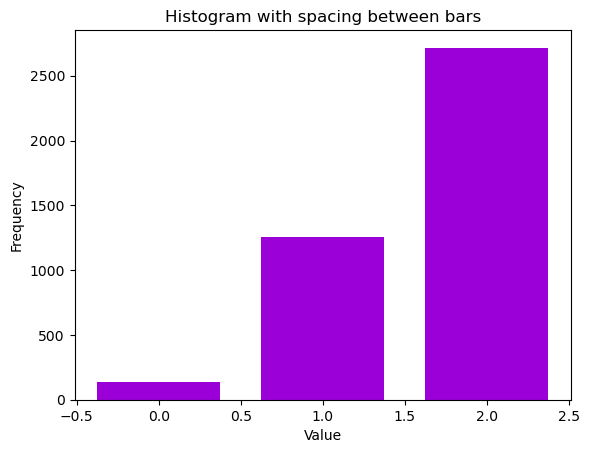

In [16]:
data = amazon['rating']
min_bin = - 0.5
max_bin = 2.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

From the previous plot we can observe how the ratings of 2 are predominant, so we have a lot of positive impressions. Anyhow, we have enough entries for worse ones to understand how they behave.

Now, we will have a look at good, neutral and bad reviews:

In [17]:
good = amazon[amazon['rating'] == 2]
good

,id,reviews.text,rating
0,AVqkIhwDv8e3D1O-lebb,Didn't have some of the features I was looking...,2
1,AVqkIhwDv8e3D1O-lebb,i Bought this around black friday for $60 hopi...,2
2,AVqkIhwDv8e3D1O-lebb,I bought this tablet for my 4 year old daughte...,2
4,AVqkIhwDv8e3D1O-lebb,The tablet works fine. It is responsive with g...,2
5,AVqkIhwDv8e3D1O-lebb,Didn't want to go to the sites amazon wanted m...,2
...,...,...,...
4097,AVphgVaX1cnluZ0-DR74,I recommend the Fire to all its teriffic and e...,2
4103,AVqkIhwDv8e3D1O-lebb,I have never owned a tablet. Wanted an I-Pad l...,2
4105,AVphgVaX1cnluZ0-DR74,simple and easy to operate; very fun to work w...,2
4107,AV1YnRtnglJLPUi8IJmV,It is so easy to read on the Kindle. It works ...,2


In [18]:
neutral = amazon[amazon['rating'] == 1]
neutral

,id,reviews.text,rating
3,AVqkIhwDv8e3D1O-lebb,I was hoping to use Google launcher with this ...,1
6,AVqkIhwDv8e3D1O-lebb,Not a good product short battery life i can on...,1
10,AVqkIhwDv8e3D1O-lebb,"If ads dont bother you, then this may be a dec...",1
12,AVqkIhwDv8e3D1O-lebb,"This is a good product for video, surfing and ...",1
16,AVqkIhwDv8e3D1O-lebb,fire tablet is very powerful for the size and ...,1
...,...,...,...
4100,AVphgVaX1cnluZ0-DR74,I really enjoy using the Fire 7 tablet. It is ...,1
4101,AVphgVaX1cnluZ0-DR74,Brought this for my daughter she loves it. Rea...,1
4104,AVqVGWLKnnc1JgDc3jF1,Wonderful tablet for the kids. It comes in nic...,1
4108,AVphgVaX1cnluZ0-DR74,This is a great tablet to purchase for kids wh...,1


In [19]:
bad = amazon[amazon['rating'] == 0]
bad

,id,reviews.text,rating
117,AVqkIhwDv8e3D1O-lebb,When my husband and I bought our Kindle Fire 8...,0
126,AVqkIhwDv8e3D1O-lebb,It's unfair for me to rate this product cause ...,0
169,AVsRjfwAU2_QcyX9PHqe,Too,0
241,AVphgVaX1cnluZ0-DR74,I think that this tablet is only good for read...,0
281,AVphgVaX1cnluZ0-DR74,Unfortunately I've been using a far superior t...,0
...,...,...,...
3947,AVqkIhwDv8e3D1O-lebb,Great screen resolution and easy to use. Batte...,0
3969,AVpjEN4jLJeJML43rpUe,I love this tablet. It's the perfect size for ...,0
4052,AVpfl8cLLJeJML43AE3S,This item is great and fun to play with. I bou...,0
4102,AV1YE_muvKc47QAVgpwE,The wife and kids love it. Thinking of buying ...,0


We may notice that we have $23775$ positive entries, $10040$ neutral and only $845$ bad ones.

In order to better observe and understand these categories we can plot some wordclouds and analyze them.

In [20]:
!pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable


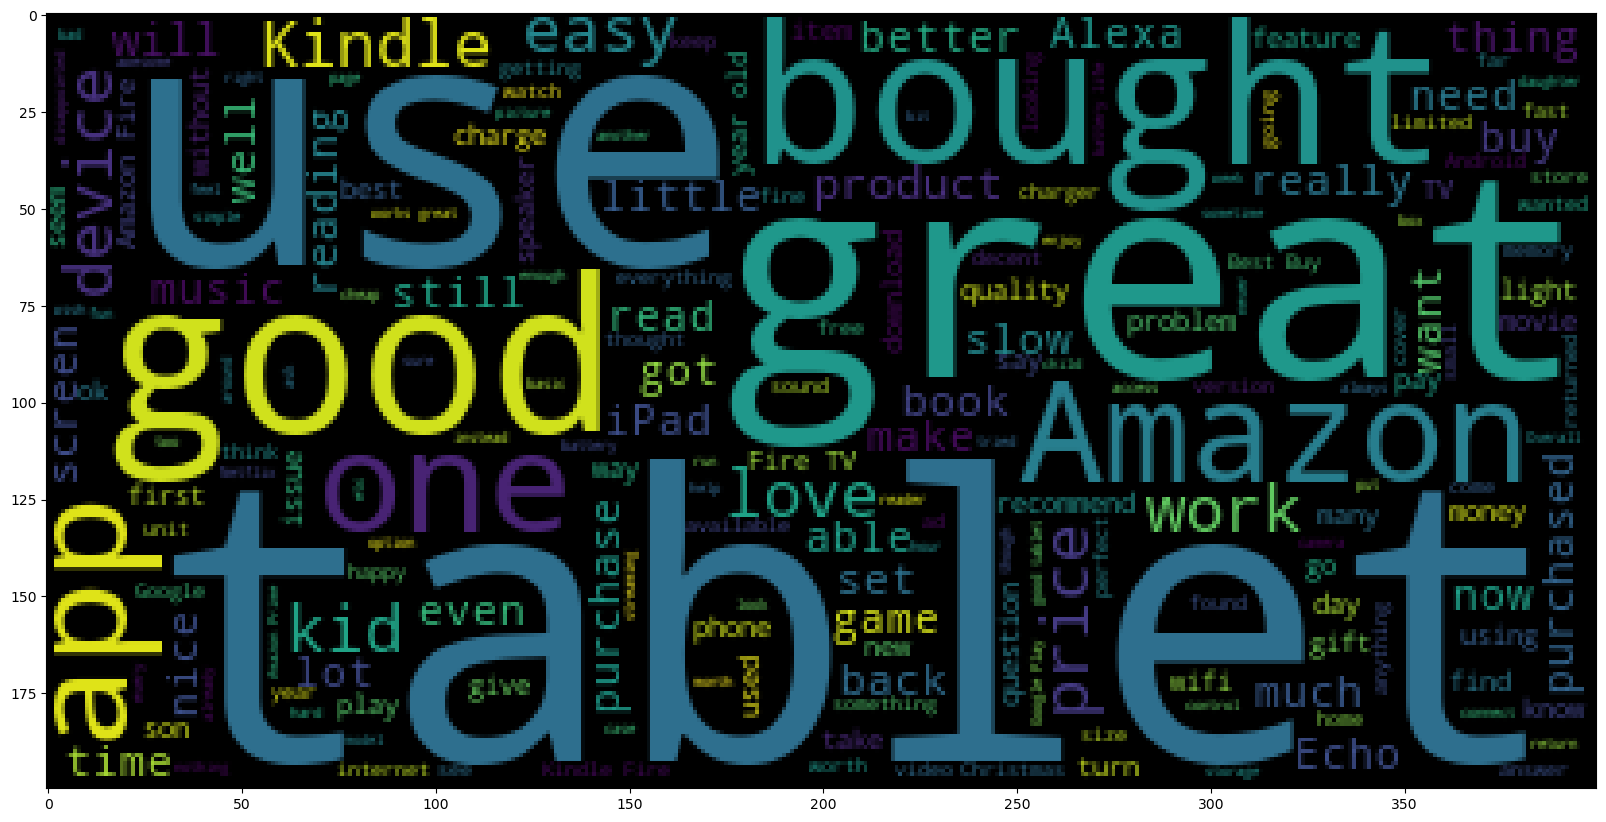

In [21]:
goods = good['reviews.text'].tolist()
goods = [str(x) for x in goods]
goods_sentence = " ".join(goods)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(goods_sentence))

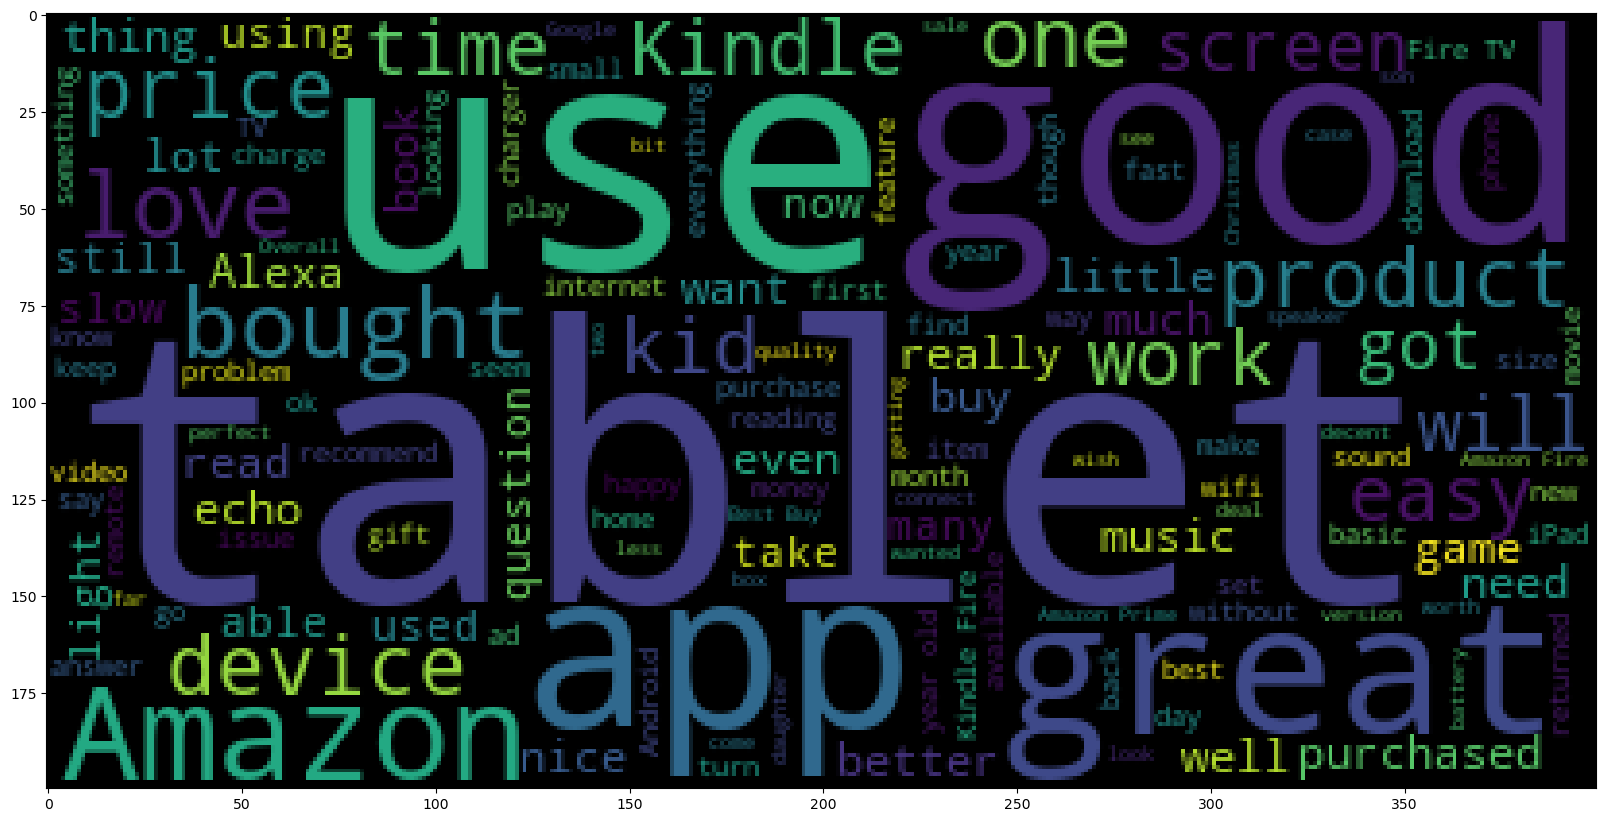

In [22]:
neutrals = neutral['reviews.text'].tolist()
neutrals = [str(x) for x in neutrals]
neutrals_sentence = " ".join(neutrals)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neutrals_sentence))

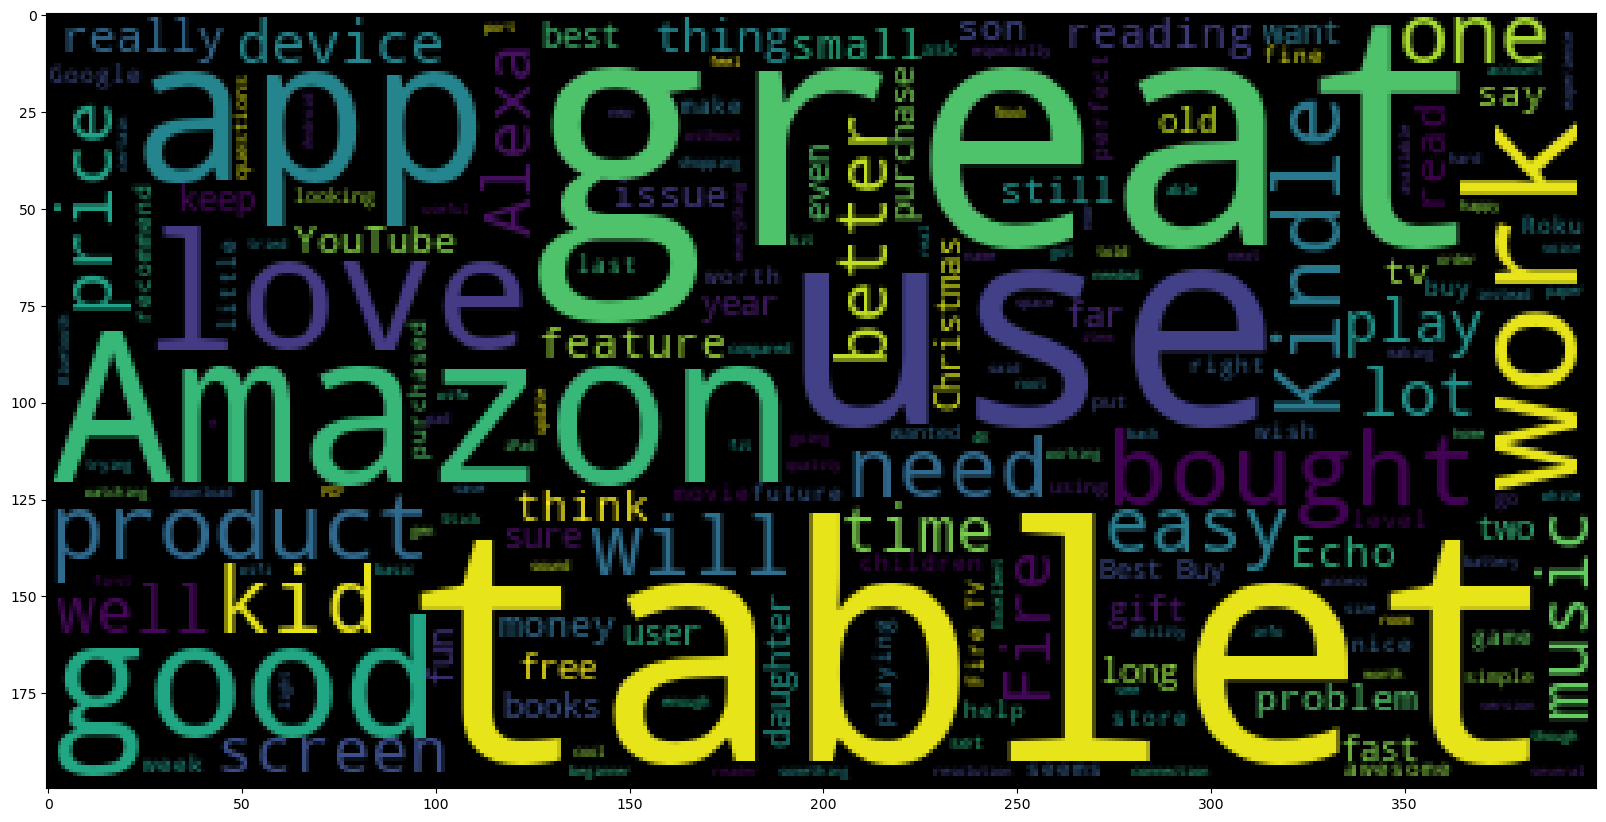

In [23]:
bads = bad['reviews.text'].tolist()
bads = [str(x) for x in bads]
bads_sentence = " ".join(bads)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(bads_sentence))

# Now that we have a clearer image upon our database, it is time we make sure we have the best data. How? Data cleaning!

## Punctuation

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
g = []
for s in goods:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    g.append(s)
goods = g
goods

['Didnt have some of the features I was looking for Returned it the next day May be good for others',
 'i Bought this around black friday for 60 hoping it would be awesome it failed so hard i tried multiple different micro SD cards none of which were recognized and YES i formated them with every format i could think of  Fat32 NTFS Fat Xfat i even tried to have the tablet do it didnt work to make matters worse half the apps i wanted to use werent in the app store and i came to find out that it isnt linked to the normal google play store this tablet has its own app store which is missing many common apps the main reason i bought this was to play clash of clans and i cant because it wasnt on the app store i tried to also use aftermarket play stores to play COC but it didnt work launched and played 1 time but didnt work or update after that needless to say i returned it and bought a 250 samsung galaxy tab A 101 2016 version with Spen and its WAYYYYY better bottom line you get what you pay 

In [26]:
n = []
for s in neutrals:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    n.append(s)
neutrals = n
neutrals

['I was hoping to use Google launcher with this tablet but it is really locked down and you cannot change the launcher or the lock screen Still cheap and fine for watching movies',
 'Not a good product short battery life i can only use for 20 minutes',
 'If ads dont bother you then this may be a decent device Purchased this for my kid and it was loaded down with so much spam it kept loading it up making it slow and laggy Plus the carrasoul loadout makes it hard to navigate for kids not very kid friendly Oh you can pay 15 to remove the ads but it wont remove them all Buy the samsung better everything',
 'This is a good product for video surfing and reading However this version has dropped all android support as far as I can tell I have a couple of apps that run on my old Fire just fine but are extremely problematic on this one There is one app I use everyday but it doesnt work on this new Fire so I have to keep the old one around Kind of inconvenient I would recommend seeing if your app

In [27]:
b = []
for s in bads:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    b.append(s)
bads = b
bads

['When my husband and I bought our Kindle Fire 8 we went to Best Buy and asked questions as best we could There are programs we apparently need to put create and edit documents and spreadsheets We did ask if it had those features and was told yes but I think we need to have a special app Why isnt there a manual or step by step guide on getting the most use out of Kindle Fire 8 Can I get it online Kindle Fire 8 fun to use but needs more info for customers Can we go to a class at Best Buy Thanks for any help',
 'Its unfair for me to rate this product cause I have not even taken it out of the box to set it up',
 'Too',
 'I think that this tablet is only good for reading books Its not very fast so you wont be able to do anything else',
 'Unfortunately Ive been using a far superior tablet when I decided to purchase the Amazon Fire tablet Comparisons are unavoidable The Amazon Fire works Amazon only apps are not as numerous as Google The tablet is not as streamlined as my other tablet',
 'i 

## Stopwords

In [28]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/eleves-a/2022/marta-teodora.trales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
g = []
for s in goods:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    g.append(s)

goods = g
goods

['Didnt features I looking Returned next day May good others',
 'Bought around black friday 60 hoping would awesome failed hard tried multiple different micro SD cards none recognized YES formated every format could think Fat32 NTFS Fat Xfat even tried tablet didnt work make matters worse half apps wanted use werent app store came find isnt linked normal google play store tablet app store missing many common apps main reason bought play clash clans cant wasnt app store tried also use aftermarket play stores play COC didnt work launched played 1 time didnt work update needless say returned bought 250 samsung galaxy tab A 101 2016 version Spen WAYYYYY better bottom line get pay also hint spen version extra 1 GB ram non pen version get afford extra 50',
 'I bought tablet 4 year old daughter Too many advertisements I would rather pay single ad',
 'The tablet works fine It responsive good resolution It tied Amazon It requires many hoops get apps Zinio work Until Amazon loosens grip I recomm

In [30]:
n = []
for s in neutrals:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    g=n.append(s)

neutrals = n
neutrals

['I hoping use Google launcher tablet really locked cannot change launcher lock screen Still cheap fine watching movies',
 'Not good product short battery life use 20 minutes',
 'If ads dont bother may decent device Purchased kid loaded much spam kept loading making slow laggy Plus carrasoul loadout makes hard navigate kids kid friendly Oh pay 15 remove ads wont remove Buy samsung better everything',
 'This good product video surfing reading However version dropped android support far I tell I couple apps run old Fire fine extremely problematic one There one app I use everyday doesnt work new Fire I keep old one around Kind inconvenient I would recommend seeing app supported Fire dropping money',
 'fire tablet powerful size everything',
 'good hate never buy sucks done',
 'My wife wanted iPad I bought cheaper good reading playing games She uses iOS products compatible She hardly ever uses Next time Ill get wants waste money',
 'Freeze frequently No way trouble shoot repair',
 'I know b

In [31]:
b = []
for s in bads:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    b.append(s)

bads = b
bads

['When husband I bought Kindle Fire 8 went Best Buy asked questions best could There programs apparently need put create edit documents spreadsheets We ask features told yes I think need special app Why isnt manual step step guide getting use Kindle Fire 8 Can I get online Kindle Fire 8 fun use needs info customers Can go class Best Buy Thanks help',
 'Its unfair rate product cause I even taken box set',
 'Too',
 'I think tablet good reading books Its fast wont able anything else',
 'Unfortunately Ive using far superior tablet I decided purchase Amazon Fire tablet Comparisons unavoidable The Amazon Fire works Amazon apps numerous Google The tablet streamlined tablet',
 'bought someone gift xmas good simple tablet someone',
 'No complaints especially price Good children elderly',
 'load apps goggle play didnt know amazon goggle dont agreements sharge',
 'Did care product Had difficulty downloading Aps',
 'Great reading books doodling work',
 'If looking simple tablet basic things This o

In [32]:
def data_cleaning(text):
    
    for word in text:
        text_no_punct_list = [c for c in s if c not in string.punctuation]
        text_no_punct = "".join(text_no_punct_list)
    return text_no_punct

    for word in text_no_punct:
    

data_cleaning("Hello,, World!! How are you?.")

IndentationError: expected an indented block after 'for' statement on line 8 (2648954508.py, line 11)

## Now we have clean data, ready to use! We will perform tokenization!

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
X = vectorizer.fit_transform(sample_data)